<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Melbourne-Housing-Dataset-analysis" data-toc-modified-id="Melbourne-Housing-Dataset-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Melbourne Housing Dataset analysis</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#Getting-to-know-the-data" data-toc-modified-id="Getting-to-know-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Getting to know the data</a></span></li><li><span><a href="#Visualision" data-toc-modified-id="Visualision-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualision</a></span></li><li><span><a href="#Features-Encoding" data-toc-modified-id="Features-Encoding-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Features Encoding</a></span></li><li><span><a href="#New-data-for-preproccesing" data-toc-modified-id="New-data-for-preproccesing-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>New data for preproccesing</a></span></li></ul></li><li><span><a href="#Models:" data-toc-modified-id="Models:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Models:</a></span><ul class="toc-item"><li><span><a href="#PipeLine" data-toc-modified-id="PipeLine-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>PipeLine</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Encoding-Pipeline" data-toc-modified-id="Encoding-Pipeline-2.1.0.1"><span class="toc-item-num">2.1.0.1&nbsp;&nbsp;</span>Encoding Pipeline</a></span></li><li><span><a href="#Assigning-attributes" data-toc-modified-id="Assigning-attributes-2.1.0.2"><span class="toc-item-num">2.1.0.2&nbsp;&nbsp;</span>Assigning attributes</a></span></li><li><span><a href="#FIt-model" data-toc-modified-id="FIt-model-2.1.0.3"><span class="toc-item-num">2.1.0.3&nbsp;&nbsp;</span>FIt model</a></span></li><li><span><a href="#Selecting-a-columns" data-toc-modified-id="Selecting-a-columns-2.1.0.4"><span class="toc-item-num">2.1.0.4&nbsp;&nbsp;</span>Selecting a columns</a></span></li></ul></li></ul></li><li><span><a href="#Liniar-Regression" data-toc-modified-id="Liniar-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Liniar Regression</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#XGboost" data-toc-modified-id="XGboost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>XGboost</a></span></li><li><span><a href="#Delete" data-toc-modified-id="Delete-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Delete</a></span></li><li><span><a href="#Test-models" data-toc-modified-id="Test-models-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Test models</a></span></li></ul></li></ul></div>

# Melbourne Housing Dataset analysis
[Dataset kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot)  

## Importing libraries

In [6]:
import pandas as pd
import numpy as np
import re

from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    r2_score, accuracy_score,
    mean_squared_error,
    log_loss, mean_absolute_error,
)

import statistics

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cycler
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
IPython_default = plt.rcParams.copy()
%matplotlib inline

## Getting to know the data

In [7]:
data = pd.read_csv('datasets/melb_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
data.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [5]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


For the "Landsize" column, you can see the maximum value of 433 014 with an average of 440. It is shows us the outlier

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

## Visualision

In [9]:
monokai_black = '#232323'

colors = cycler('color',
                ['#CCCC00','#3399FF','#59f4ff','#884dff', '#4dff62', 
                 '#6f992f', '#ffa230','#ff3030','#545454','#000000'])
plt.rc('axes', axisbelow=True, grid=True, titlesize=15,
       prop_cycle=colors, titlecolor='white', labelcolor='white')
plt.rc('figure', figsize=(16,6), facecolor='#232323')
plt.rc('xtick', direction='out', color='white')
plt.rc('ytick', direction='out', color='white')
plt.rc('legend', facecolor='#232323', edgecolor='white')
plt.rc('lines', linewidth=2.5)
plt.rc('patch', force_edgecolor=True, facecolor='#232323',
       edgecolor='black', lw=1.5)
plt.rc('text', color='white')

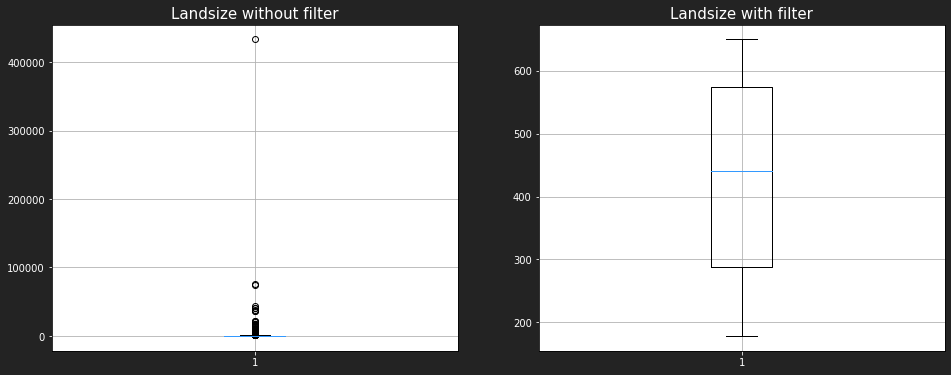

In [10]:
low, high = data['Landsize'].quantile([0.25,0.75])
data_column_filter = data.query('{low}<Landsize<{high}'.format(low=low,high=high))


fig, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(data['Landsize'])
ax1.set_title('Landsize without filter')

ax2.boxplot(data_column_filter['Landsize'])
ax2.set_title('Landsize with filter')

plt.show()

In [11]:
def currency(x, pos):
    'Two arguments - value and position of mark'
    if x >= 1000000:
        return '$ {:1.1f}M'.format(x*1e-6)
    return '$ {:1.0f}K'.format(x*1e-3)

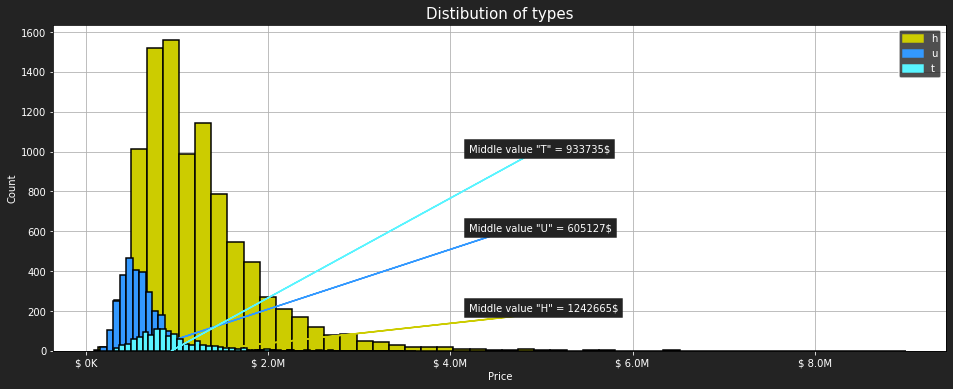

In [12]:
fig, ax = plt.subplots()

types = []
b = 0
for i, col in zip(data.Type.unique(), colors.by_key()['color']):

    d = data[data['Type'] == i]
    ax.hist(d.Price, color=col, bins=50)
    ax.arrow(d.Price.mean(), 0, 4000000, 200 + b, color=col)
    ax.annotate('Middle value "{}" = {:1.0f}$'.format(str.upper(i), d.Price.mean()),
                [4200000, 200 + b],
                backgroundcolor=monokai_black,
                )

    types.append(i)
    b += 400

ax.set(title='Distibution of types', xlabel='Price', ylabel='Count')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend(types)
plt.show()

In [13]:
def template_regex(data, column):
    
    X = pd.Series()
    set_streets, tags = [], []
    for st in data[column].unique():
        st = st.strip('\n')
        regex = re.findall(r'[^/0-9]\D+', st, re.IGNORECASE)
        if regex:
            if len(regex[0].split()) > 2:
                set_streets.append(regex[0].split()[1].lower())
                tags.append(regex[0].split()[2].lower())
            else:
                set_streets.append(regex[0].strip().split()[0].lower())
                tags.append(regex[0].strip().split()[1].lower())
                
    tags.append('the')
    tags.append('y')
    tags = set(tags)
    for tag in tags:
        for st in set(set_streets):
            if tag == st:
                set_streets = list(filter(lambda x: x!= st, set_streets))
    return set_streets

In [817]:
def replace_regex(data, column):
    
    assert type(data) == pd.core.frame.DataFrame
    assert type(data[column]) == pd.core.series.Series
    
    X = data.copy()
    for st in template_regex(data,column):
        for idx,pt in enumerate(data[column]):
            if st in pt.lower().split():
                X.loc[X.index[idx], column] = st
    return X[column]

In [396]:
%%time
data['Street'] = replace_regex(data, 'Address')

CPU times: user 4min 10s, sys: 2.95 s, total: 4min 13s
Wall time: 4min 33s


In [458]:
most_popular_streets = pd.pivot_table(data=data,index='Street', 
                                      values='Price', aggfunc=len)\
                                      .sort_values('Price', ascending=False)[:50]\
                                      .rename(columns={'Price':'Number of sales'})

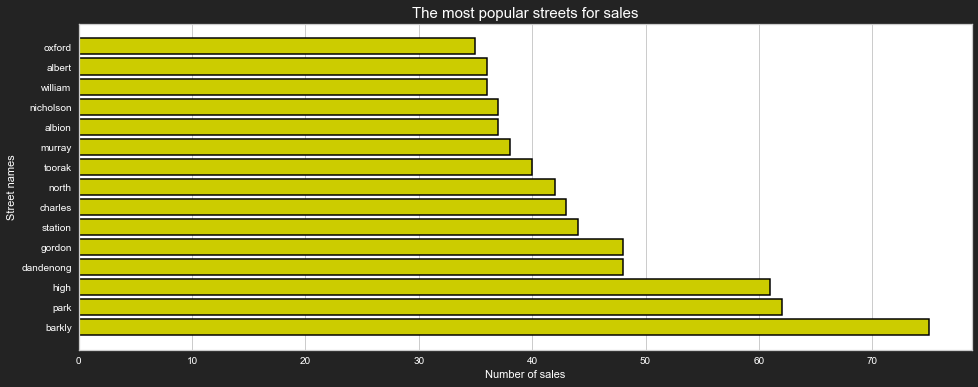

In [519]:
fig, ax = plt.subplots()
ax.barh(y=most_popular_streets.index[:15], 
        width=most_popular_streets['Number of sales'][:15])
ax.set(title='The most popular streets for sales', 
       xlabel='Number of sales', ylabel='Street names')
ax.grid(b=False, axis='y')
plt.show()

In [659]:
def sort_columns(data, index, sort_column, slice=25):
    return pd.pivot_table(data=data, index=index, 
                                      values=sort_column, aggfunc=sum)\
                                      .sort_values(sort_column, ascending=False)[:slice]

In [793]:
def axis_coder(column):
    n = len(column)
    if n == 2:
        return (1,2)
    elif n == 1:
        return(1,1)
    else:
        if n%2 == 0:
            return (n//2, n//2)
        else:
            return (n/2+1, n//2)

In [805]:
def plotting_bars(x, y, data):
    if (type(x) is list)&(len(x)>=2):
        for col in x:
            col_sort = sort_columns(data, index=y, sort_column=col)
            fig, ax = plt.subplots(axis_coder(x)[0],
                               axis_coder(x)[1])
            print(ax)
            for i in range(axis_coder(x)[0]):
                if len(ax) > 2:
                    for j in range(axis_coder(x)[1]):
                        ax[i,j].barh(col_sort.index, col_sort[col])
                        ax[i,j].set(title='Title for {}'.format(col))
                else: 
                    ax[i].barh(col_sort.index, col_sort[col])
        return None
                    
                    
    elif type(x) == str:
        col_sort = sort_columns(data, index=y, sort_column=x)
        fig, ax = plt.subplots()
        ax.barh(col_sort.index, col_sort[x])   

[<AxesSubplot:> <AxesSubplot:>]
[<AxesSubplot:> <AxesSubplot:>]


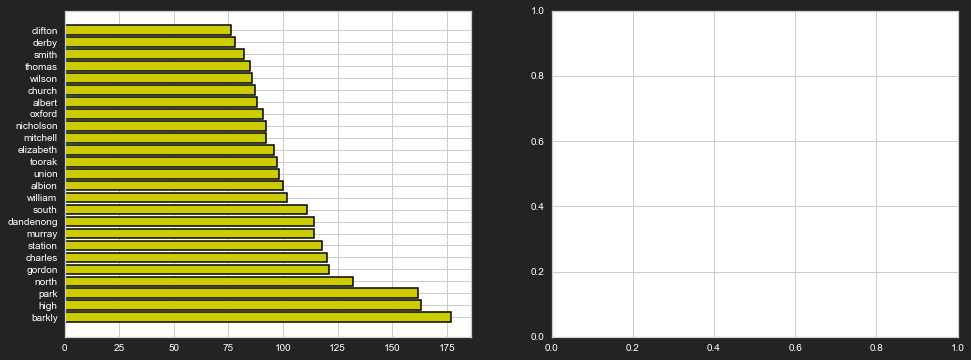

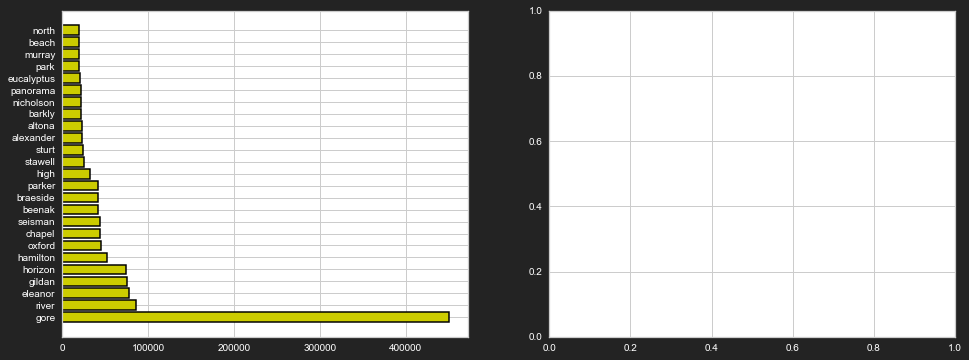

In [806]:
plotting_bars(['Rooms','Landsize'],'Street',data)

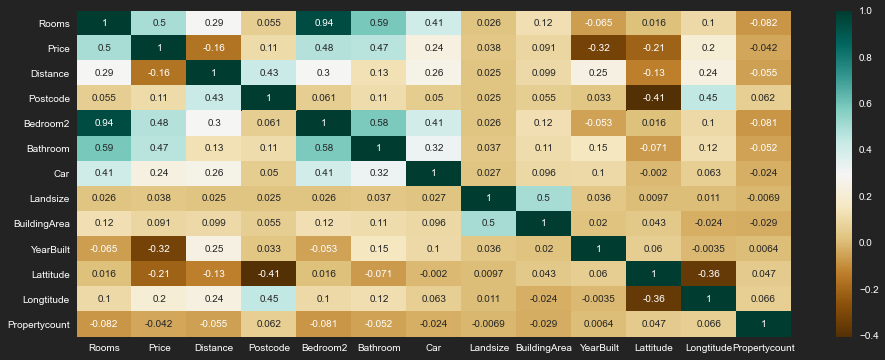

In [818]:
plt.figure()
cor = data.corr()
sns.heatmap(data=cor,cmap='BrBG', annot=True)
plt.show()

As you can see, all the attributes except "Property count" have a *correlation > 0.2*   
with at least two other attributes.  
Therefore, I consider it necessary to remove this extra feature.

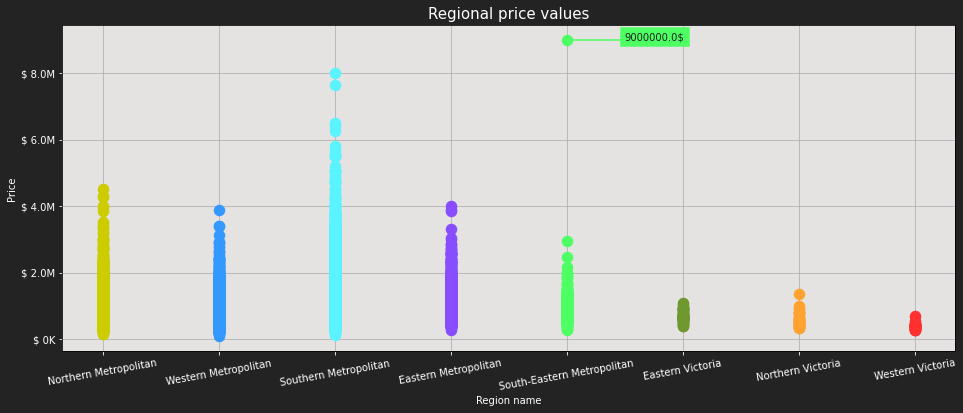

In [14]:
fig, ax = plt.subplots()
idx = 0
for reg,col in zip(data.Regionname.unique(),colors.by_key()['color']):
    d = data[data['Regionname']==reg]
    ax.scatter(d.Regionname, d.Price, s=100)
    if d.Price.max() == data.Price.max():
        ax.arrow(idx, d.Price.max(), .5, 0, color=col)
        ax.annotate(f"{d.Price.max()}$", [idx+.5, data.Price.max()],
                   backgroundcolor=col, color=monokai_black)
    idx+=1
ax.set(title='Regional price values', xlabel='Region name', ylabel='Price')
ax.set_facecolor('#E5E2E2')
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=10)
plt.show()

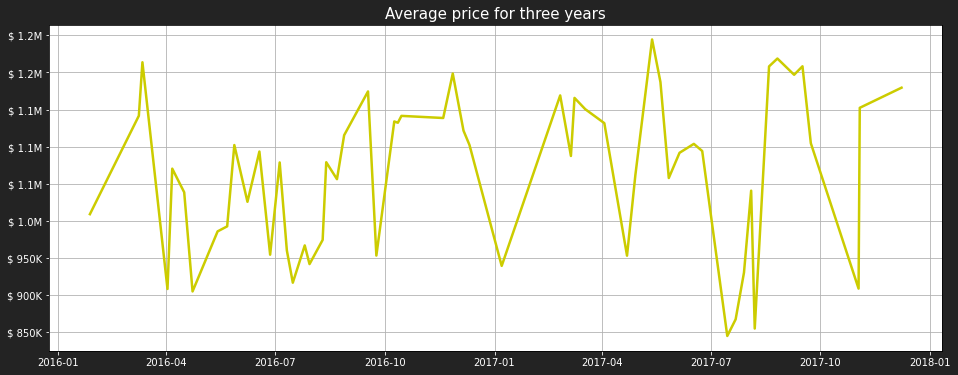

In [15]:
fig, ax = plt.subplots()
ax.plot(pd.pivot_table(data=data, values='Price',
                       index='Date', aggfunc='mean'))
ax.yaxis.set_major_formatter(formatter)
ax.set(title='Average price for three years')
plt.show()

    !pip install ipyleaflet
    !pip install ipywidgets
    !jupyter nbextension enable --py --sys-prefix gmaps

In [25]:
import gmaps
import gmaps.datasets
import os
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])
fig = gmaps.figure(center=(-37.86788, 145.12121), zoom_level=12)
fig
# earthquake_df = gmaps.datasets.load_dataset_as_df('earthquakes')
# earthquake_df.head()

Figure(layout=FigureLayout(height='420px'))

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
9968,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,...,1.0,4.0,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0


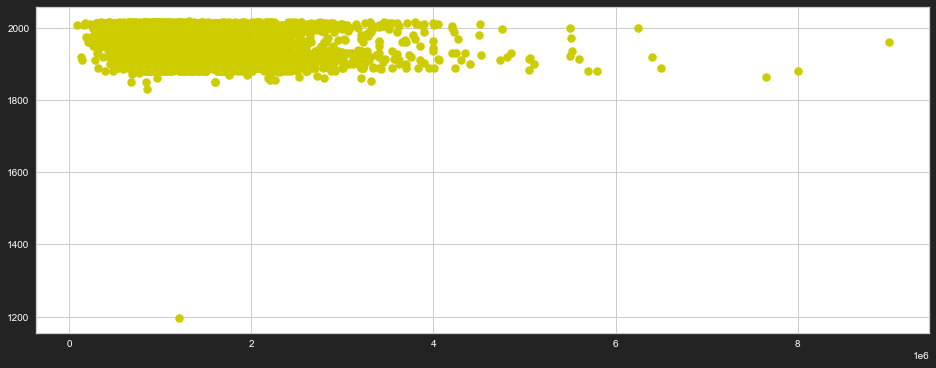

In [821]:
fig, ax = plt.subplots()
ax.scatter(data.Price, data.YearBuilt, label='Price/Year')
data[data['YearBuilt'] < 1700]

## Features Encoding 

In [14]:
o = (data.dtypes == 'object')
obj_list = list(o[o].index)
for obj in obj_list:
    print(
        f'number of unique {obj} values --> {len(data[obj].unique())} | full shape: {data.shape[0]}')

number of unique Suburb values --> 314 | full shape: 13580
number of unique Address values --> 13378 | full shape: 13580
number of unique Type values --> 3 | full shape: 13580
number of unique Method values --> 5 | full shape: 13580
number of unique SellerG values --> 268 | full shape: 13580
number of unique CouncilArea values --> 34 | full shape: 13580
number of unique Regionname values --> 8 | full shape: 13580


In [23]:
data_1 = data.drop(['Address','SellerG', 'Suburb', 'Date','CouncilArea'], axis=1)

In [19]:
data_1.isna().sum()

Rooms               0
Type                0
Price               0
Method              0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [24]:
def fill_nan(df):
    '''
    
    '''
    for col in df.columns[df.isnull().any()]:
        if df[col].dtype == 'float64':
            df[col].fillna(data[col].median(), inplace=True)
        else:
            df[col].fillna(data[col].mode()[0], inplace=True)
            
    return df

In [27]:
def encoding(df, ordinal, nominal):    

    for obj in df.columns:
        ordinal_encoder = OrdinalEncoder()
        one_hot_encoder = OneHotEncoder(categories=obj)
        
        if obj in ordinal:
            df[obj] = ordinal_encoder.fit_transform(df[[obj]])

        elif obj in nominal:
            
            nominal_pd = pd.get_dummies(df[obj])
            print(f'New columns {obj}: {list(nominal_pd.columns)}')
            df.drop(obj, axis=1, inplace=True)
            df = pd.concat([df, nominal_pd], axis=1)
        else:
            continue
            
    return df

## New data for preproccesing 

In [31]:
# activate this cell to active the main cells
data_1 = fill_nan(data_1)
data_1 = encoding(data_1, 
         ordinal=['Type', 'Method'],
         nominal=['Regionname']
        )

New columns Regionname: ['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']


# Models:


## PipeLine

#### Encoding Pipeline

In [248]:
num_transformer = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

label_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
])

ordinal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder()),
])

In [249]:
def category_selector(data, threshold=30):
    """
    Classifies and selects columns by type
    """

    num_features = []
    label_features = []
    ordinal_features = []

    for col in data.columns:

        if data[col].dtype == 'object':
            # mean value of the label category
            if threshold >= len(data[col].unique()) >= 8:
                label_features.append(col)
            elif len(data[col].unique()) < 8:
                ordinal_features.append(col)
            else:
                print(
                    f'{len(data[col].unique())} attributes of the {col} column')
#                 continue

        elif col not in num_features:
            if data[col].dtype == 'float64':
                num_features.append(col)

            elif data[col].dtype == 'int64':
                num_features.append(col)

        else:
            print(
                f'WARNING: column "{col}" is of the wrong type {data[col].dtype}')
#             continue

    return num_features, label_features, ordinal_features

In [250]:
def frame_preprocesses(X, col_names):
    if col_names:
        return pd.DataFrame(X, columns=col_names)
    else:
        return pd.DataFrame(X)

In [251]:
def columns_name():
#     cols_names = pipe['preprocessor'].fit_transform(X_train)
    try:
        cols_names = pipe['preprocessor'].transformers_[0][2]
    except AttributeError:
        return None

    for col in pipe['preprocessor'].transformers_[1][1][1]\
                       .get_feature_names():
        cols_names.append(col)

    for col in pipe['preprocessor'].transformers_[2][2]:
        cols_names.append(col)
    return cols_names

In [252]:
class CorrelationDropper(BaseEstimator, TransformerMixin):
    def __init__(self, drop_low_corr=False):  
        self.drop_low_corr = drop_low_corr

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        low_corr_list = []
        X = frame_preprocesses(X, columns_name())
        for idx, column in enumerate(X.columns):
            try:
                x1 = X[column]
            except KeyError:
                continue
            for other in X.drop(column, axis=1).columns:
                x2 = X[other]
                c = np.corrcoef(x1, x2)[0][1]
                if (self.drop_low_corr) & (-0.1 < c < 0.1):
                    low_corr_list.append(c)
                    if len(low_corr_list) > len(X.columns)-2:
                        X = X.drop(column, axis=1)
                        print(f'"{column}" has dropped')
                        
                elif(c <= -0.8) | (c >= 0.8):
                    X = X.drop(x2.name, axis=1)
                    #print(x2.name)
            low_corr_list = []
    
        return X

#### Assigning attributes

In [253]:
X = data.drop('Price',axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42,
                                                   )

num_list, label_list, ordinal_list = category_selector(X_train)
print(X_train.shape, y_train.shape)

306 attributes of the Suburb column
10726 attributes of the Address column
249 attributes of the SellerG column
58 attributes of the Date column
34 attributes of the CouncilArea column
(10864, 20) (10864,)


In [254]:
preprocessor = ColumnTransformer([
        ('number', num_transformer, num_list),
        ('label', label_transformer, label_list),
        ('ordinal', ordinal_transformer, ordinal_list),
])

pipe = Pipeline([
    ('preprocessor',preprocessor),
    ('corr', CorrelationDropper()),
])

In [165]:
h = pipe.fit_transform(X_train, y_train)
h

,Rooms,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,x0_Eastern Metropolitan,x0_Eastern Victoria,x0_Northern Metropolitan,x0_Northern Victoria,x0_South-Eastern Metropolitan,x0_Southern Metropolitan,x0_Western Metropolitan,x0_Western Victoria,Type,Method
0,0.333333,0.295218,0.152508,0.250,0.2,0.009254,0.003594,0.744681,0.415080,0.649497,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.222222,0.295218,0.152508,0.125,0.2,0.010786,0.003459,0.718640,0.405894,0.653087,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.111111,0.095634,0.124872,0.125,0.1,0.001092,0.003459,0.718640,0.470983,0.543598,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0
3,0.111111,0.066528,0.055271,0.125,0.1,0.000000,0.001707,0.771277,0.506899,0.491704,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,0.333333,0.270270,0.208802,0.250,0.1,0.003888,0.003459,0.718640,0.345921,0.541314,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,0.222222,0.232848,0.074719,0.125,0.1,0.000000,0.003459,0.531915,0.595398,0.514910,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10860,0.111111,0.074844,0.069601,0.125,0.1,0.002184,0.002089,0.319149,0.522713,0.504257,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10861,0.222222,0.054054,0.123849,0.125,0.1,0.005100,0.003459,0.867021,0.462197,0.516920,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10862,0.111111,0.288981,0.168884,0.250,0.1,0.002676,0.001775,0.930851,0.327188,0.579138,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [255]:
model = Pipeline([
    ('pipe', pipe),
    ('lr', LinearRegression()),
])

grid_params_lr = [
    {'lr__normalize': [True],
     'lr__n_jobs':[-1, 0, 1],
     },
    {'pipe': [{'corr__drop_low_corr': [True],
               }]
     },
]

#### FIt model

In [256]:
%%time
LR = GridSearchCV(estimator=model,
            param_grid=grid_params_lr,
            cv=10) 

lr = LR.fit(X_train, y_train)

CPU times: user 23.1 s, sys: 1.93 s, total: 25.1 s
Wall time: 19.1 s



#### Selecting a columns

## Liniar Regression

In [33]:
X = data_1.drop('Price',axis=1)
y = data_1['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42,
                                                   )

In [ ]:
%%time
lr = LinearRegression()
params = {
            "fit_intercept":[True,False],
            "n_jobs":[-1,0,1],
            "normalize":[True,False],
}
lr_grid = GridSearchCV(lr, params)
lr_grid.fit(X_train, y_train)



lr_trans_grid = TransformedTargetRegressor(
    regressor=GridSearchCV(lr, params),
    transformer=QuantileTransformer(n_quantiles=900,
                                    output_distribution='normal'))

lr_trans_grid.fit(X_train, y_train)

In [ ]:
lr_pred = lr_grid.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_pred)

lr_trans_pred = lr_trans_grid.predict(X_test)
lr_trans_mae = mean_absolute_error(y_test, lr_trans_pred)

f, (ax0, ax1) = plt.subplots(2, sharey='row', figsize=(6.5, 8))


ax0.scatter(lr_pred, y_test, s=8)
ax0.plot([0, lr_pred.max()], [0, lr_pred.max()], '--k')
ax0.text(0e6, 6e6, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, lr_pred), mean_absolute_error(y_test, lr_pred)))

ax1.scatter(lr_trans_pred, y_test, s=8)
ax1.plot([0, lr_trans_pred.max()], [0, lr_trans_pred.max()], '--k')
ax1.text(0e6, 6e6, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, lr_trans_pred), mean_absolute_error(y_test, lr_trans_pred)))

plt.show()



## RandomForest

In [ ]:
def procent_20(x):
    return round((20*len(x))/100)

X_train_20 = X_train[:procent_20(X_train)]
y_train_20 = y_train[:procent_20(y_train)]

print(X_train_20.shape,X_train.shape)
print(y_train_20.shape,y_train.shape)

In [ ]:
% % time
rfr = RandomForestRegressor()

params = {
    "n_estimators": [100, 150, 200],
    "random_state": [None, 25, 46],
    "warm_start": [True, False],
}

rfr_grid = GridSearchCV(rfr, params)
rfr_grid.fit(X_train_20, y_train_20)


print(
    f'Best parametrs: {rdr_grid.best_params_}\nBest score: {rdr_grid.best_score_}'
)

In [ ]:
rfr = RandomForestRegressor(
    warm_start=True,
    n_estimators=150,
)
rfr.fit(X_train, y_train)

In [ ]:
rfr_pred = rfr.predict(X_test)
rfr_mae = mean_absolute_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
print(
    f'MAE: {mean_absolute_error(y_test, rfr_pred)}\nRMSE: {np.sqrt(mean_squared_error(y_test, rfr_pred))}'
)
print(rfr.score(X_test,y_test))
rates['RFR'] = [rfr_mae, rfr_rmse]

## XGboost

In [ ]:
%%time
xgb = xgboost.XGBRegressor()

xgb.fit(X_train, y_train)

In [ ]:
xgb_pred = xgb.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print(
    f'MAE: {mean_absolute_error(y_test, xgb_pred)}\nRMSE: {np.sqrt(mean_squared_error(y_test, xgb_pred))}'
)

rates['XGB'] = [xgb_mae, xgb_rmse]
print(xgb.score(X_test,y_test))

In [ ]:
for model, rate in rates.items():
    print(
        f'{model} MAE--> {round(rate[0])}\n{model} RMSE--> {round(rate[1])}\n{"-"*50}'
    )

## Delete

In [122]:
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split()
data_2 = data.drop(['Address', 'SellerG', 'Suburb',
                    'Date', 'CouncilArea'], axis=1)



price_predict = data_2['Price']
price_features = data_2.drop('Price', axis=1)

In [135]:
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [226]:
# dense_transformer = Pipeline([])


nominal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(dtype=np.float32)),
])

ordinal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordencoding', OrdinalEncoder()),
])

quantitative_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

In [227]:
from pandas.api.types import is_numeric_dtype
data_trans = {}
for col in data_2.columns:
    if is_numeric_dtype(data_2[col]):
        data_trans[col] = quantitative_transformer.fit_transform(data_2[col].values.reshape(1,-1))
    else:
        if len(data_2[col].unique())>5:
            data_trans[col] = nominal_transformer.fit_transform(data_2[col].values.reshape(1,-1))
        else:
            data_trans[col] = ordinal_transformer.fit_transform(data_2[col].values.reshape(1,-1))

## Test models

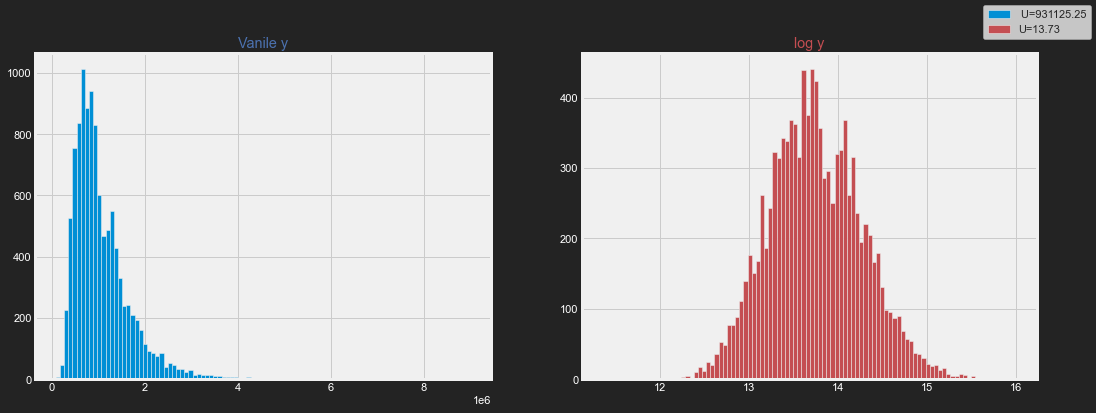

In [279]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

gmean = lambda y: statistics.geometric_mean(y)

ax1.hist(y_train, bins=100, 
         label=' U={:.2f}'.format(gmean(y_train), color='green'))

ax1.set_title('Vanile y', color='b')
fig.set_facecolor('#232323')#1e1e1e 

    
ax2.hist(np.log(y_train), bins=100, color='r',
         label='U={:.2f}'.format(gmean(np.log(y_train))))

ax2.set_title('log y', color='r')
fig.legend()
plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(16, 4))
# # ax.set_facecolor('#616161')
# plt.xticks(rotation=90)
# sns.boxplot(data=features)
# ax.set(title='Boxplot before', xlabel='Features', ylabel='Value')
# sns.set_theme(style='ticks')

# low = .05
# high = .95
# quant_df = features.quantile([low, high])
# norm_features = features.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
#                                     (x < quant_df.loc[high,x.name])], axis=0)

# fig, ax = plt.subplots(figsize=(16, 4))
# sns.boxplot(data=norm_features)
# ax.set(title='Boxplot after', xlabel='Features', ylabel='Value')
# plt.xticks(rotation=90)
# plt.show()